# Titanic 数据分析

### 介绍：考虑到给的知乎参考文件中已经给了一些参数和死亡率的关系，所以这里就只将没有进行分析的SibSp（乘客的兄弟姐妹和配偶数量）作为参数来作为例子进行数据可视化

#### 知乎提供文章的数据预处理，自己添加了中文显示处理

In [182]:
# 这两行代码查看电脑系统中已经有的文字，我找了个'Microsoft JhengHei'微软正黑，
# import matplotlib as mpl
# mpl.font_manager.FontManager().ttflist

#这一行是进行语言设置，这样的话整个文档都能显示这个中文字体了 
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#导入数据
#训练数据集
train = pd.read_csv(r'C:\Users\17123\Desktop\xiangmu\Data_Analysis\Titanic\train.csv')

train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [184]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']#设置中文显示

In [185]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
n = train['Survived'].value_counts()
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, '总体生还率')

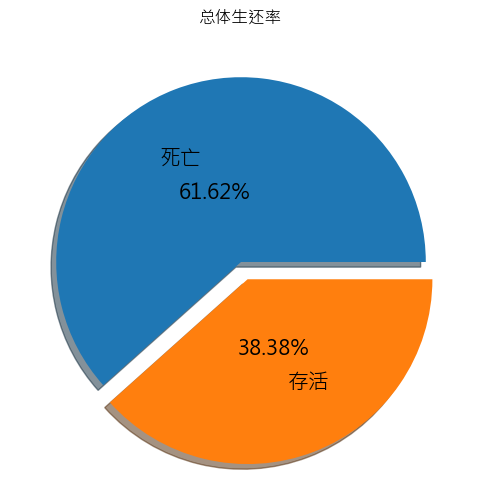

In [188]:
plt.figure(figsize=(6,6))
plt.pie(n,autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       shadow=True,explode=[0,0.1],textprops=dict(size=15))
plt.title('总体生还率')

#### SibSp数据分析

数据可视化用2个条形图

处理第一个条形图

In [189]:
#看种类及数量value_counts()
n_sibsp = train['SibSp'].value_counts()
train['SibSp'].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [190]:
type(n_sibsp)#这里可知这个数据类型是series，所以后面就用pandas的语法将这个series进行排序


pandas.core.series.Series

In [191]:
n_sibsp = n_sibsp.sort_index()#按照索引进行排序
n_sibsp


0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [192]:
#x,y_1表示船上的不同的 乘客的兄弟姐妹和配偶数量 对应的人数
#x,y_2表示船上的不同的 乘客的兄弟姐妹和配偶数量 对应死亡的人数
x = list(n_sibsp.index)#提取索引作为一个序列
y_1 = list(n_sibsp.values)#提取值作为一个序列

处理第二个条形图

In [229]:
y_2=[]
slice_0 = train.loc[:,['Survived','SibSp']]
slice_0

,Survived,SibSp
0,0,1
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
886,0,0
887,1,0
888,0,1
889,1,0


In [230]:
for i in range(0,9):
    slice_a=slice_0.loc[slice_0["SibSp"]==i,:]
    slice_b=slice_a.loc[slice_a["Survived"]==1,:]
    y_2.append(len(slice_b))

In [231]:
y_2#结果可以看出来5678都是0，所以直接减2个0，剩下2个0代表5和8

[210, 112, 13, 4, 3, 0, 0, 0, 0]

In [232]:
y_2.remove(0)
y_2.remove(0)

In [233]:
y_1

[608, 209, 28, 16, 18, 5, 7]

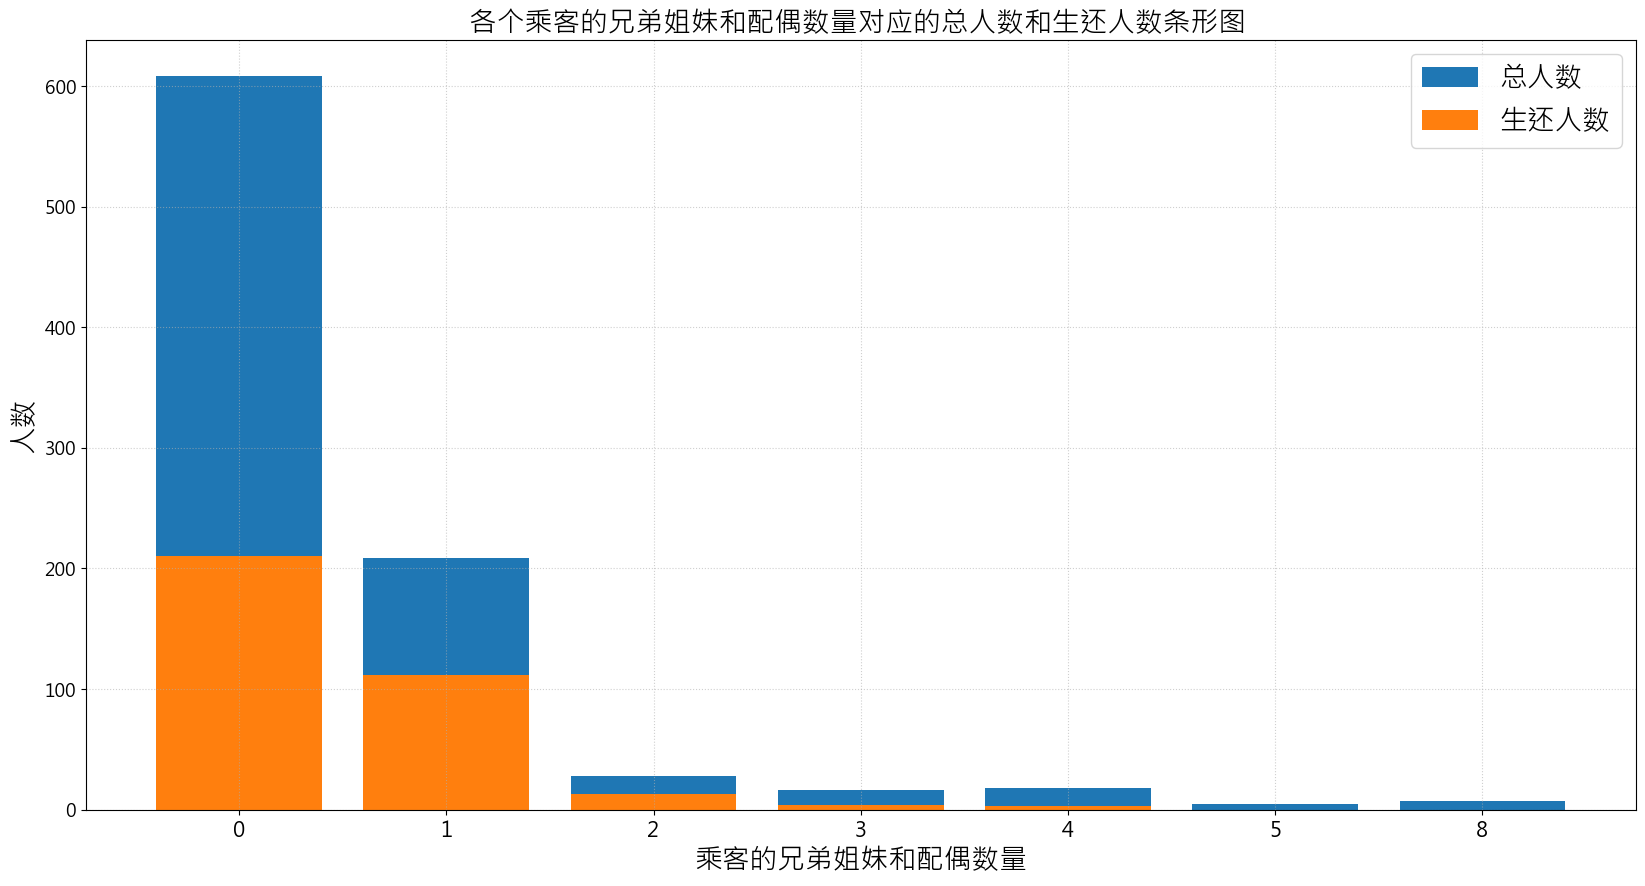

In [256]:
plt.figure(figsize=(20,10))
plt.bar(range(len(x)),y_1, label="总人数")
plt.bar(range(len(x)),y_2, label="生还人数")
plt.xticks(range(len(x)),x,fontsize=15)
plt.yticks(fontsize=13)
plt.title('各个乘客的兄弟姐妹和配偶数量对应的总人数和生还人数条形图 ',fontsize=20)
plt.grid(True,linestyle=':',alpha=0.6)
plt.xlabel('乘客的兄弟姐妹和配偶数量',position=(0.95,0),fontsize=20)
plt.ylabel('人数',position=(0,0.95),fontsize=20)
plt.legend(loc="upper right", fontsize=20)

#### 数据分析

由图可知：<br />
1.在这个邮轮中，单独来的游客最多，并且携带的数量越多，游客越少
2.在这个邮轮死亡的人数中，单独来的游客最多，并且携带的数量越多，生还人数越少
3.携带1和2个兄弟姐妹或者配偶的游客死亡率都接近50%，其他均低于50%

## end